In [4]:
from modsim import *

In [5]:
def make_system(beta, gamma) -> System:
    init = State(s=89, i=1, r=0)
    init /= init.sum()
    return System(init=init, t_end=7*14, beta=beta, gamma=gamma)

def update_func(t, state, system):
    s, i, r = state.s, state.i, state.r
    infected = system.beta * i * s
    recovered = system.gamma * i
    s -= infected
    i += infected - recovered
    r += recovered
    return State(s=s, i=i, r=r)

def run_simulation(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init
    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)
    return frame

In [6]:
def add_immunization(system, fraction):
    system.init.s -= fraction
    system.init.r += fraction

In [7]:
tc = 3 # time between contacts
tr = 4 # time to recover
beta = 1/tc # infection rate
gamma = 1/tr # recovery rate
system1 = make_system(beta, gamma)
results1 = run_simulation(system1, update_func)

In [8]:
# add immunication
system2 = make_system(beta, gamma)
add_immunization(system2, 0.1)
results2 = run_simulation(system2, update_func)

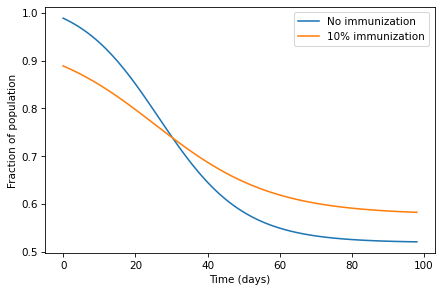

In [9]:
results1.s.plot(style='-', label='No immunization')
results2.s.plot(label='10% immunization')
decorate(xlabel='Time (days)', ylabel='Fraction of population')

In [10]:
def calc_total_infected(results, system):
    s_0 = results.s[0]
    s_end = results.s[system.t_end]
    return s_0 - s_end


In [11]:
calc_total_infected(results1, system1), calc_total_infected(results2, system2)

(np.float64(0.468320811028781), np.float64(0.30650802853979753))

In [12]:
def sweep_immunity(fraction_array):
    sweep = SweepSeries()
    for fraction in fraction_array:
        system = make_system(beta, gamma)
        add_immunization(system, fraction)
        results = run_simulation(system, update_func)
        sweep[fraction] = calc_total_infected(results, system)
    return sweep

In [13]:
fraction_array = linspace(0, 1, 21)
infected_sweep = sweep_immunity(fraction_array)

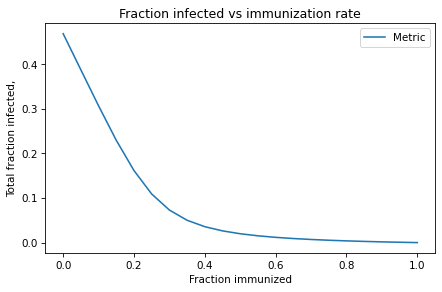

In [14]:
infected_sweep.plot()
decorate(xlabel='Fraction immunized', ylabel='Total fraction infected,',
         title='Fraction infected vs immunization rate')

In [15]:
# Exercise 12.1
# Suppose we have the option to quarantine infected students. 
# For example, a student who feels ill might be moved to an infirmary 
# or a private dorm room until they are no longer infectious. 
# How might you incorporate the effect of quarantine in the SIR model?”
def make_system_with_quarantine(beta, gamma, quarantine_rate) -> System:
    init = State(s=89, i=1, r=0)
    init /= init.sum()
    return System(init=init, t_end=7*14, beta=beta, gamma=gamma, quarantine_rate=quarantine_rate)

def update_func_with_quarantine(t, state, system):
    s, i, r = state.s, state.i, state.r
    infected = system.beta * i * (1 - system.quarantine_rate) * s 
    recovered = system.gamma * i
    s -= infected
    i += infected - recovered
    r += recovered
    return State(s=s, i=i, r=r)

In [16]:
system3 = make_system_with_quarantine(beta, gamma, 0.1) # quarantine rate 10%
results3 = run_simulation(system3, update_func_with_quarantine)

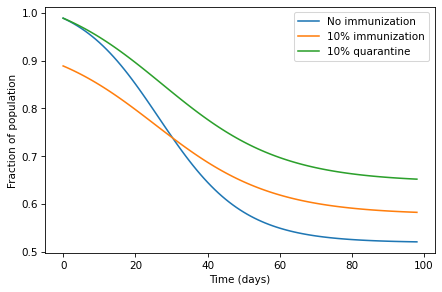

In [17]:
results1.s.plot(style='-', label='No immunization')
results2.s.plot(label='10% immunization')
results3.s.plot(label='10% quarantine')
decorate(xlabel='Time (days)', ylabel='Fraction of population')